In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import sklearn as sk

In [2]:
#import my dataset using pandas function
df = pd.read_csv('Telco_Customer_Churn_Dataset.csv', delimiter=',')
df #displaying my dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:

#Statistical Analysis of My Data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
#Ssatistical Analysis of the Sum Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:

#Calculating outliers
Q1 = df['tenure'].quantile(0.25)  # First quartile (25th percentile)  
Q3 = df['tenure'].quantile(0.75)  # Third quartile (75th percentile)  
IQR = Q3 - Q1  # Interquartile Range
IQR

np.float64(46.0)

In [6]:
lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers  
upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
print(lower_bound)
print(upper_bound)

-60.0
124.0


In [7]:

df['InternetService'].nunique()


3

In [8]:
#Looking for Outliers
outliers = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [9]:
#Looking unique values for Column(PaymentMethod) with multi-value
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [10]:
#Value for Each PaymentMethod
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [11]:
#Grouping my Data into Numerical and Categorical
cat = []#List for categorical Data 
num = []#list for Numerical Data
for x in df.columns:
     if df[x].dtypes == object:
      cat.append(x)
     else:
         num.append(x)
cat

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [12]:
#Displaying the information of my Dataset
for i in cat :
    print(f'The number of unique value of {i} is {df[i].nunique()}')
    print(f'The unique values in {i} are {df[i].unique()}')
    print(df[i].value_counts())
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")

The number of unique value of customerID is 7043
The unique values in customerID are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
The number of unique value of gender is 2
The unique values in gender are ['Female' 'Male']
gender
Male      3555
Female    3488
Name: count, dtype: int64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
The number of unique value of Partner is 2
The unique values in Partner are ['Yes' 'No']
Partner
No     3641
Yes    3402
Name: count, dtype: int64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
The number of unique value of Dependents is 2
The unique values in Dependents are ['No' 'Yes']
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [13]:
#Importing Seaborn library for Visualization 
import seaborn as sns

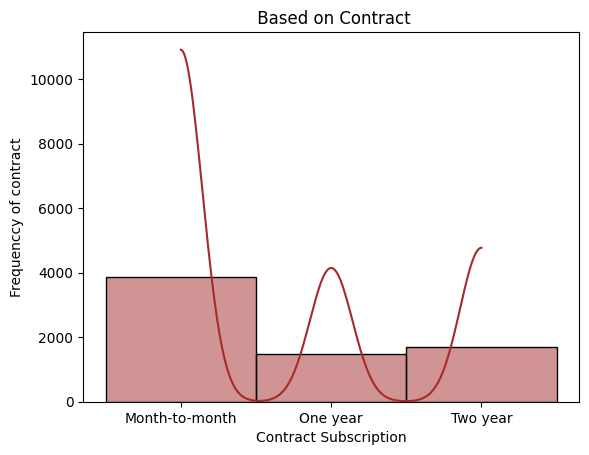

In [14]:
#Univeriate Visualization of Customers based on Contract
sns.histplot(data=df, x='Contract', color='brown', kde=True)
plt.title(' Based on Contract')
plt.xlabel('Contract Subscription')
plt.yscale=10
plt.ylabel('Frequenccy of contract')
plt.show()

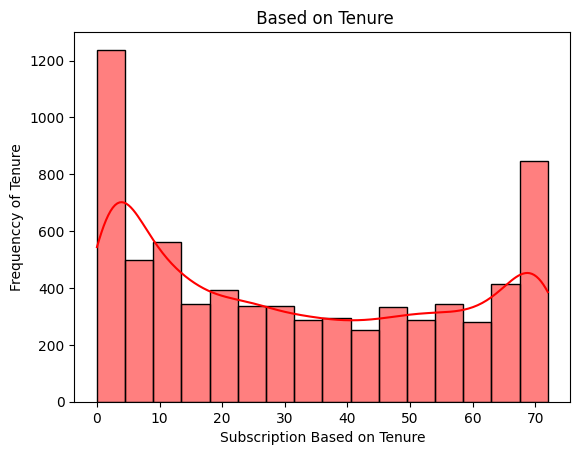

In [15]:
#Univeriate Visualization of Customers based on Tenure
sns.histplot(data=df, x='tenure', color='red', kde=True)
plt.title(' Based on Tenure')
plt.xlabel('Subscription Based on Tenure')
plt.yscale=10
plt.ylabel('Frequenccy of Tenure')
plt.show()

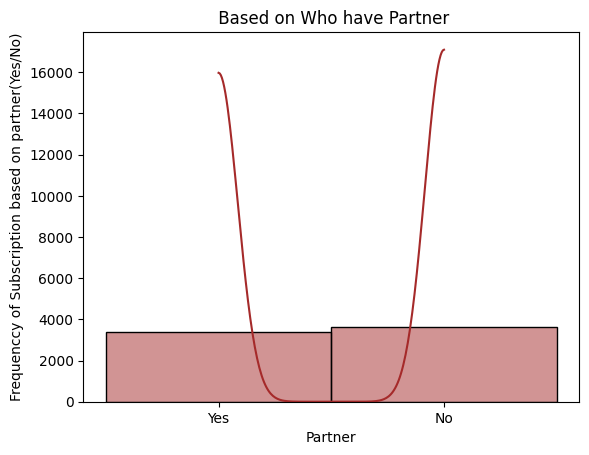

In [16]:
#Univeriate Visualization of Customers based on Partner
sns.histplot(data=df, x='Partner', color='brown', kde=True)
plt.title(' Based on Who have Partner')
plt.xlabel('Partner')
plt.yscale=10
plt.ylabel('Frequenccy of Subscription based on partner(Yes/No)')
plt.show()

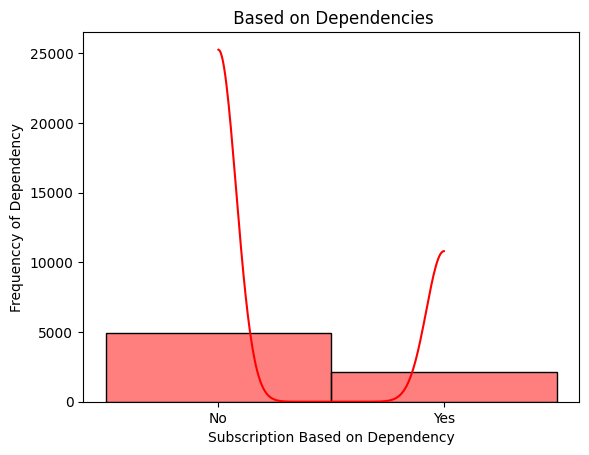

In [17]:
#Univeriate Visualization of Customers based on Dependency
sns.histplot(data=df, x='Dependents', color='red', kde=True)
plt.title(' Based on Dependencies')
plt.xlabel('Subscription Based on Dependency')
plt.yscale=10
plt.ylabel('Frequenccy of Dependency')
plt.show()

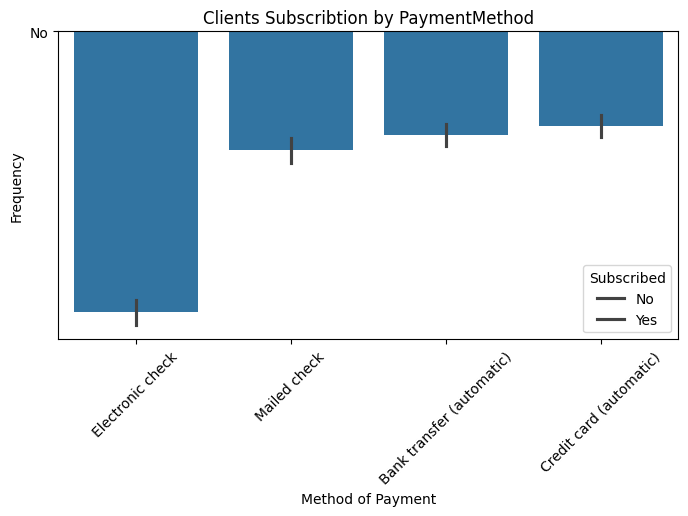

In [18]:
#Univeriate Visualization of Customers based on Payment Method
plt.figure(figsize=(8,4))
sns.barplot(data=df,  x='PaymentMethod', y='Churn', )
plt.title(f'Clients Subscribtion by PaymentMethod')
plt.xlabel('Method of Payment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

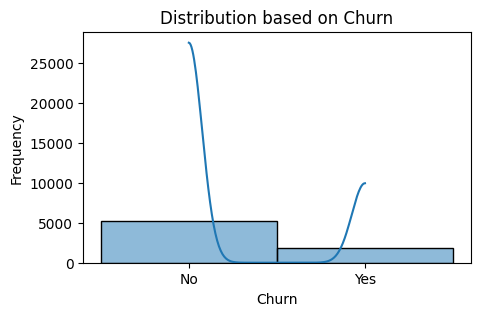

In [19]:
#Univeriate Visualization of Customers based on Probability of Customers Leaving(Churn)
plt.figure(figsize=(5,3))
sns.histplot(data=df, x="Churn", kde=True)
plt.title('Distribution based on Churn')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

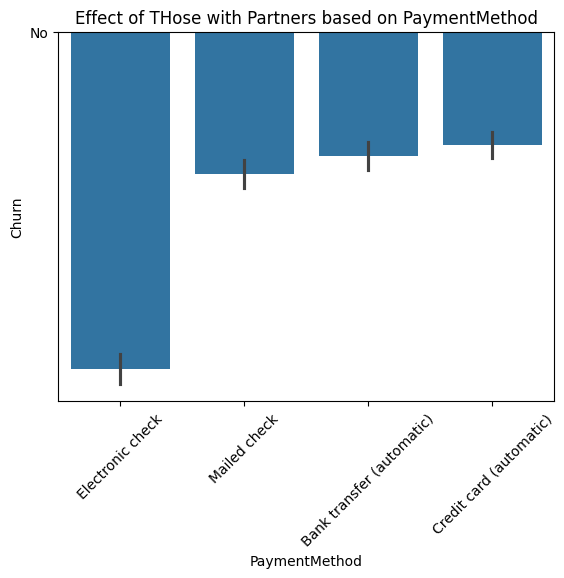

<Figure size 2400x1200 with 0 Axes>

In [20]:
#Biveriate Visualization of Customers based on PaymentMethod with Churn 
sns.barplot(data=df,x="PaymentMethod", y="Churn")
plt.title('Effect of THose with Partners based on PaymentMethod')
plt.xticks(rotation=45)
plt.figure(figsize=(24,12))
plt.show()

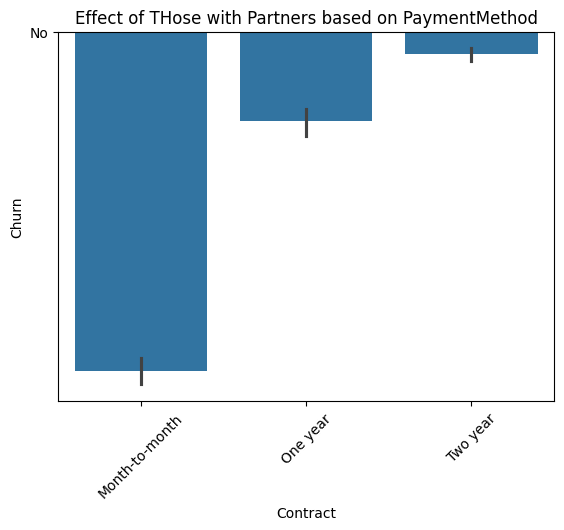

<Figure size 2400x1200 with 0 Axes>

In [ ]:
#Biveriate Visualization of Customers based on PaymentMethod with Churn 
sns.barplot(data=df,x="Contract", y="Churn")
plt.title('Effect of Churn based on Contract')
plt.xticks(rotation=45)
plt.figure(figsize=(24,12))
plt.show()

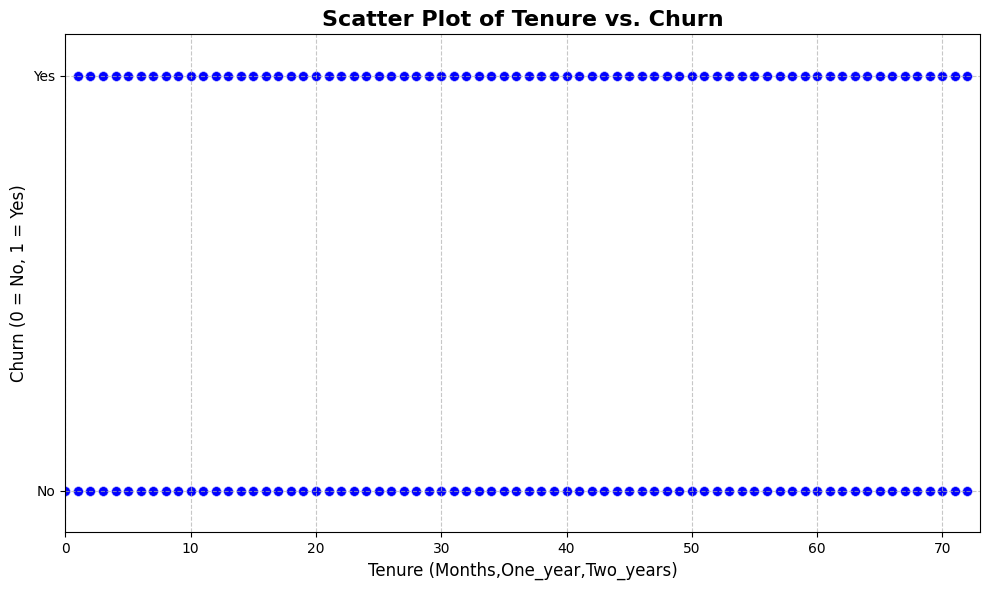

In [ ]:
# Create the scatter plot  
plt.figure(figsize=(10, 6))  
plt.scatter(df['tenure'], df['Churn'], s=50, c='blue', alpha=0.6, edgecolors='w', linewidth=0.5)  

# Adding titles and labels with improved font size  
plt.title("Scatter Plot of Tenure vs. Churn", fontsize=16, fontweight='bold')  
plt.xlabel("Tenure (Months,One_year,Two_years)", fontsize=12)  
plt.ylabel("Churn (0 = No, 1 = Yes)", fontsize=12)  

# Add a grid for better readability  
plt.grid(True, linestyle='--', alpha=0.7)  

# Seting x and y limits  for better visual balance  
plt.xlim(0, df['tenure'].max() + 1)  
plt.ylim(-0.1, 1.1)  

# Displaying the plot  
plt.tight_layout()   
plt.show()

C:\Users\Win11\AppData\Local\Temp\ipykernel_9320\2295938742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='PaymentMethod', y='Churn', palette='Set2', size=6, jitter=True)


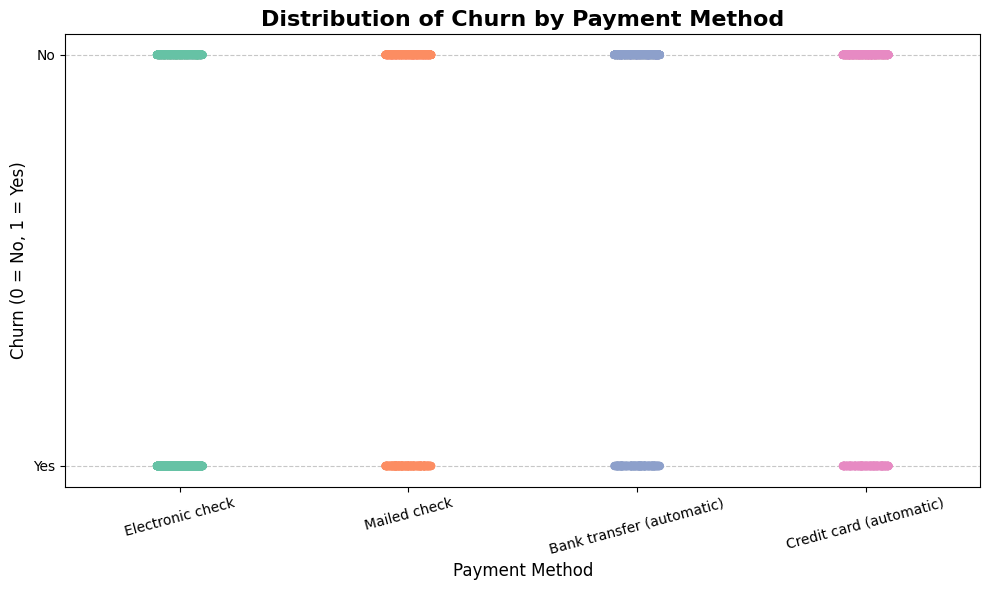

In [ ]:
import matplotlib.pyplot as plt  
  
# Creating the strip plot (which is more efficient for larger datasets)  
plt.figure(figsize=(10, 6))  
sns.stripplot(data=df, x='PaymentMethod', y='Churn', palette='Set2', size=6, jitter=True)  

# Adding titles and labels with improved font size  
plt.title("Distribution of Churn by Payment Method", fontsize=16, fontweight='bold')  
plt.xlabel("Payment Method", fontsize=12)  
plt.ylabel("Churn (0 = No, 1 = Yes)", fontsize=12)  

# Adding a grid for better readability  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Adjusting layout for clarity  
plt.xticks(rotation=15)  # Rotation of x-labels for better visibility  
plt.tight_layout()  
plt.show()

<Axes: >

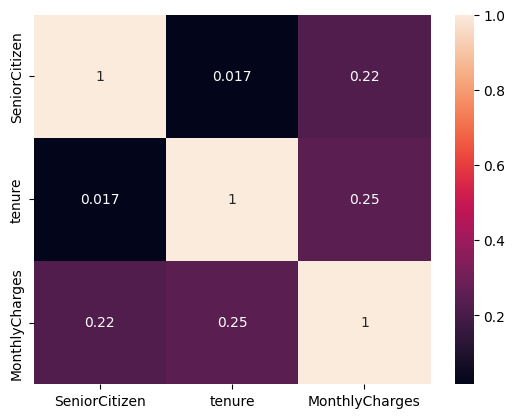

In [29]:
#Multiveriate Visualization of Customers based on Numerical Data 
num_df = df[num]
num_df.corrwith(df['tenure'])
sns.heatmap(data= num_df.corr(), annot= True)